<a href="https://colab.research.google.com/github/Dipto1971/Statistical-Analysis-Data-Science/blob/main/LAB/LAB_06/LAB_06(Exercise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1g0Y27WxxsQCWWagNqUvajlre3tDOKsbM

Downloading...
From: https://drive.google.com/uc?id=1g0Y27WxxsQCWWagNqUvajlre3tDOKsbM
To: /content/syntactic_car_factory_data.csv
100% 528k/528k [00:00<00:00, 13.2MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/syntactic_car_factory_data.csv')
df.head()

df.drop("Unnamed: 0" , axis=1 , inplace=True)
df.head()

# Fill missing values
df.info()
df.fillna(df.mean(numeric_only=True), inplace= True)

for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sensor_1       2471 non-null   float64
 1   Sensor_2       2439 non-null   float64
 2   Sensor_3       2460 non-null   float64
 3   Sensor_4       2422 non-null   float64
 4   Sensor_5       2439 non-null   float64
 5   Sensor_6       2477 non-null   float64
 6   Sensor_7       2467 non-null   float64
 7   Sensor_8       2436 non-null   float64
 8   Sensor_9       2415 non-null   float64
 9   Sensor_10      2478 non-null   float64
 10  Sensor_Status  2469 non-null   object 
 11  Shift          2451 non-null   object 
 12  Line           2470 non-null   object 
dtypes: float64(10), object(3)
memory usage: 304.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         -------

<ipython-input-2-3764cf799ac8>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


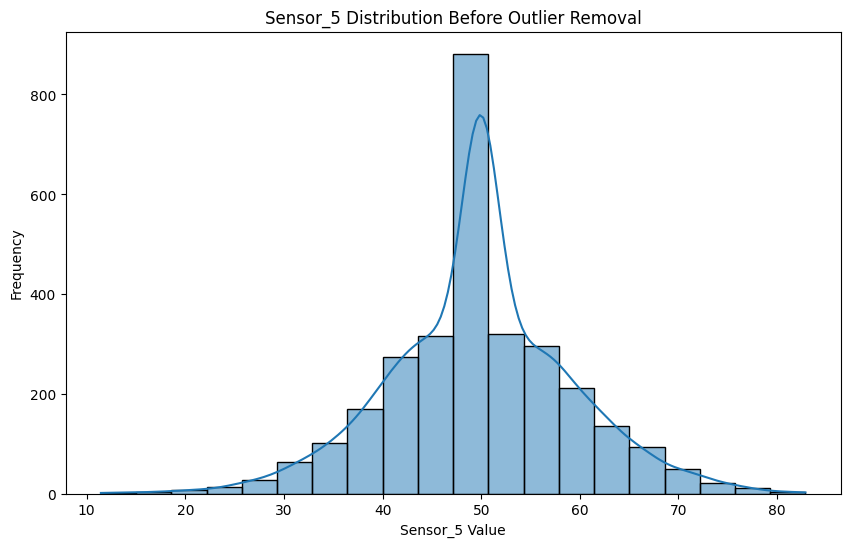

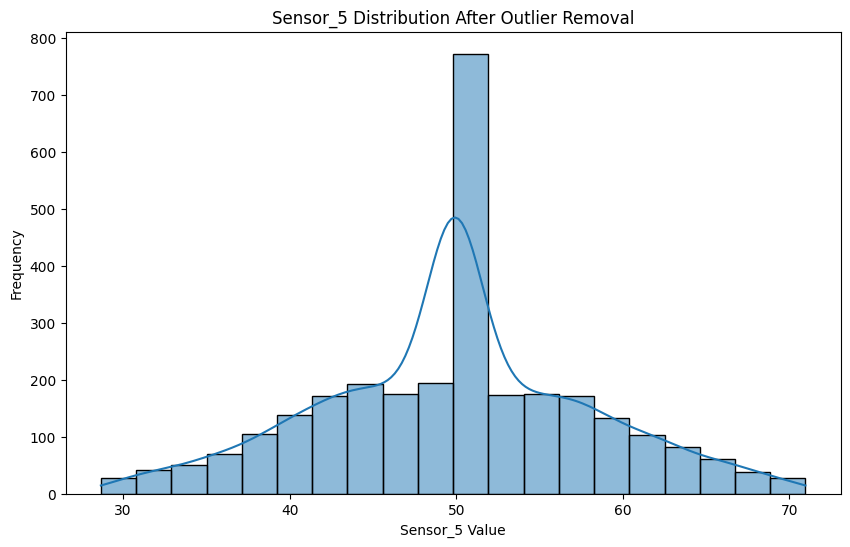

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify and remove outliers using IQR for Sensor_5

Q1 = df['Sensor_5'].quantile(0.25)
Q3 = df['Sensor_5'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_data = df[(df['Sensor_5'] >= Q1 - 1.5 * IQR) & (df['Sensor_5'] <= Q3 + 1.5 * IQR)]

# Plot of uncleaned dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['Sensor_5'], bins=20, kde=True)
plt.title('Sensor_5 Distribution Before Outlier Removal')
plt.xlabel('Sensor_5 Value')
plt.ylabel('Frequency')
plt.show()

# Plot the cleaned dataset
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Sensor_5'], bins=20, kde=True)
plt.title('Sensor_5 Distribution After Outlier Removal')
plt.xlabel('Sensor_5 Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

morning_data = df[df['Shift'] == 'Morning']
night_data = df[df['Shift'] == 'Night']

# Perform independent t-test
t_stat, p_value = ttest_ind(morning_data['Sensor_7'], night_data['Sensor_7'])

print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha=0.05
if p_value < alpha:
    print("There is a significant difference in Sensor_7 between Morning and Night shifts.")
else:
    print("There is no significant difference in Sensor_7 between Morning and Night shifts.")

T-statistic: -0.49761531890118854
P-value: 0.6188045992808413
There is no significant difference in Sensor_7 between Morning and Night shifts.


In [ ]:
# Investigate if the occrance of Faulty Status depends on the shift (Morning, Afternoon & Night) using the chi-Square test. State the hypothesis and interpret the test result
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(df['Sensor_Status'], df['Shift'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
print(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("There is a significant association between Shift and Status.")
else:
    print("There is no significant association between Shift and Status.")

Chi-square statistic: 1.104984474417665
P-value: 0.8934805592591464
Degrees of freedom: 4
Expected frequencies:
 [[209.844 370.912 223.244]
 [212.193 375.064 225.743]
 [360.963 638.024 384.013]]
Shift          Evening  Morning  Night
Sensor_Status                         
Faulty             205      383    216
Maintenance        217      369    227
Operational        361      632    390
There is no significant association between Shift and Status.
